# Business Understanding

# Data Understanding

In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading all the necessary datasets
#bom.movie_gross dataset
bom_movie = pd.read_csv('/content/drive/MyDrive/bom.movie_gross.csv')
bom_movie.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#Get info on the bom_movie dataset
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
#Get the shape of the bom_movie dataset
bom_movie.shape

(3387, 5)

In [5]:
#tmdb.movies dataset
tmdb_movies = pd.read_csv('/content/drive/MyDrive/tmdb.movies.csv')
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
#Get info on the tmdb_movie dataset
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [7]:
#Get the  shape of the tmdb_movies dataset
tmdb_movies.shape

(26517, 10)

In [8]:
#tn.movie_budgets dataset
tn_movie_budgets = pd.read_csv('/content/drive/MyDrive/tn.movie_budgets.csv')
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
#Get info on the tn_movie_budgets dataset
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [10]:
#Get the shape of the tn_movie_budgets dataset
tn_movie_budgets.shape

(5782, 6)

Establishing a connection to the database

In [11]:
#Establishing connection to the sql database and checking the available tables
conn = sqlite3.connect('/content/drive/MyDrive/im.db')
pd.read_sql("""
SELECT name
FROM sqlite_master
WHERE type = 'table';
""",conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [12]:
#connecting to the sql database with imdb ratings and reading the first 5 rows
im_movie_ratings = pd.read_sql("""
                  SELECT*
                  FROM movie_ratings;
                  """,conn)
im_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [13]:
#connecting to the sql database with imdbbasics and reading the first 5 rows
im_movie_basics = pd.read_sql("""
                  SELECT*
                  FROM movie_basics;
                  """,conn)
im_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# Data Preparation

In [14]:
#Checking for null values in the bom_movies dataset
bom_movie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [15]:
#Drop studio and domestic gross columns NaNs dataset
bom_movie = bom_movie.dropna(subset=['studio','domestic_gross'])


In [16]:
#Checking to see whether the two columns have been dropped
bom_movie.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

In [17]:
# Fill in foreign_gross NaNs with 0
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].fillna(0)

<ipython-input-17-15df908ac9be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie['foreign_gross'] = bom_movie['foreign_gross'].fillna(0)


In [18]:
# Remove the commas from foreign gross
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].str.replace(',', '')

<ipython-input-18-0d66817f3ba5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie['foreign_gross'] = bom_movie['foreign_gross'].str.replace(',', '')


In [19]:
# Change datatype from object to float
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].astype(float)

In [20]:
#Checking to see if the datatype has changed to float
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


####Joining the SQL tables from the data understanding

In [21]:
# Join the two tables based on the movie_id column which is unique
IM_DB = pd.read_sql("""
SELECT *
FROM movie_ratings
JOIN movie_basics
    USING(movie_id)
""", conn);

IM_DB

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


####**Merge the combined SQL table with the bom_movie dataframe**

We can combine the newly merged SQL table's column primary_title with our movie_gross column title.


In [22]:
ratings_gross = pd.merge(IM_DB, bom_movie, left_on = 'primary_title', right_on = 'title')

In [23]:
ratings_gross.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",The Legend of Hercules,LG/S,18800000.0,42400000.0,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,Baggage Claim,FoxS,21600000.0,887000.0,2013
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Moneyball,Sony,75600000.0,34600000.0,2011
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",Hereafter,WB,32700000.0,72500000.0,2010
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Mission: Impossible - Ghost Protocol,Par.,209400000.0,485300000.0,2011


####Checking for duplicates

In [24]:
ratings_gross['title'].duplicated().value_counts()

False    2580
True      424
Name: title, dtype: int64

####Dropping the duplicate values


In [25]:
ratings_gross = ratings_gross.drop_duplicates(subset='title')

In [26]:
#Checking whether the values have dropped
ratings_gross['title'].duplicated().value_counts()

False    2580
Name: title, dtype: int64

# Data Analysis

In [27]:
# Creating a copy of this dataframe for future use

ratings_gross_b = ratings_gross.copy()

I'd like to identify the primary movie genres that Microsoft Studios should prioritize for their films. To achieve this, I intend to analyze movies that have achieved significant box office success, specifically those earning $25 million or more, and determine which genres are most frequently associated with these high-grossing movies.

In [28]:
# Filtering our dataframe for movies that have grossed over $25M
ratings_gross = ratings_gross[ratings_gross['domestic_gross'] > 25000000]

In [29]:
# Checking the number of unique genres from the filtered data
ratings_gross['genres'].nunique()

147

Given that each movie can be associated with up to three genres, there are currently 147 unique genre combinations. However, to simplify the analysis and make it more interpretable, I plan to break down these combinations into individual genres rather than considering them as combined genres. This way, we can focus on each specific genre separately.

In [30]:
# Using the lambda function to iterate through each list within the genres column
# Splitting on the comma, if there is one, and leave if there isn't a comma
ratings_gross['genres'] = ratings_gross['genres'].apply(
    lambda x: x.split(",") if x else x)
# Checking the changes
ratings_gross.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"[Biography, Drama, Sport]",Moneyball,Sony,75600000.0,34600000.0,2011
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"[Drama, Fantasy, Romance]",Hereafter,WB,32700000.0,72500000.0,2010
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"[Action, Adventure, Thriller]",Mission: Impossible - Ghost Protocol,Par.,209400000.0,485300000.0,2011
5,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"[Action, Comedy, Crime]",21 Jump Street,Sony,138400000.0,63100000.0,2012
7,tt1261945,4.4,69199,Sex and the City 2,Sex and the City 2,2010,146.0,"[Comedy, Drama, Romance]",Sex and the City 2,WB (NL),95300000.0,193000000.0,2010


Now that the 'genre' column has been transformed into lists, each genre enclosed within square brackets, our next step is to compile a list of unique genres mentioned in the dataset. To achieve this, we can use the 'set' data structure, ensuring that each genre is included only once, even if it appears multiple times in different movies

In [31]:
# Creating an empty set
all_genres = set()
# Iterating through genres column for each element
for genres in ratings_gross['genres']:
    if genres:
        # add genre to the set
        all_genres.update(genres)
# Check to see if it worked
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

Our next objective is to create new columns for each genre and initialize their values to zero

In [32]:
# Iterating through the set
for genre in all_genres:
    # Making a new column in dataframe and fill the columns with zeros
    ratings_gross[genre] = np.zeros(shape=ratings_gross.shape[0])
# Checking the changes
ratings_gross.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,...,Horror,Fantasy,Drama,Biography,Adventure,History,Comedy,Western,War,Romance
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"[Biography, Drama, Sport]",Moneyball,Sony,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"[Drama, Fantasy, Romance]",Hereafter,WB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"[Action, Adventure, Thriller]",Mission: Impossible - Ghost Protocol,Par.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"[Action, Comedy, Crime]",21 Jump Street,Sony,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,tt1261945,4.4,69199,Sex and the City 2,Sex and the City 2,2010,146.0,"[Comedy, Drama, Romance]",Sex and the City 2,WB (NL),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, we'll iterate through the 'genres' column and increment the count for each specific genre whenever it's mentioned for a particular movie title.

In [33]:
# Iterating through the genre column and index the genre rows.
for index, row in ratings_gross.iterrows():
    # If the value in genres
    if row['genres']:
        # Matches a genre column
        for genre in row['genres']:
            # Changing that value to 1.
            ratings_gross.loc[index, genre] = 1
# Checking our changes.
ratings_gross.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,...,Horror,Fantasy,Drama,Biography,Adventure,History,Comedy,Western,War,Romance
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"[Biography, Drama, Sport]",Moneyball,Sony,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"[Drama, Fantasy, Romance]",Hereafter,WB,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"[Action, Adventure, Thriller]",Mission: Impossible - Ghost Protocol,Par.,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"[Action, Comedy, Crime]",21 Jump Street,Sony,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,tt1261945,4.4,69199,Sex and the City 2,Sex and the City 2,2010,146.0,"[Comedy, Drama, Romance]",Sex and the City 2,WB (NL),...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [34]:
# Now we have the total number of times each specific genre is mentioned
ratings_gross.sum()

<ipython-input-34-2fb47d84008a>:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ratings_gross.sum()


movie_id           tt1210166tt1212419tt1229238tt1232829tt1261945t...
averagerating                                                 4822.3
numvotes                                                   133721272
primary_title      MoneyballHereafterMission: Impossible - Ghost ...
original_title     MoneyballHereafterMission: Impossible - Ghost ...
start_year                                                   1482127
runtime_minutes                                              80986.0
title              MoneyballHereafterMission: Impossible - Ghost ...
studio             SonyWBPar.SonyWB (NL)WB (NL)SonyPar.TriSFoxFox...
domestic_gross                                         74159199992.0
foreign_gross                                    108033641856.899994
year                                                         1482193
Animation                                                       82.0
Mystery                                                         58.0
Sci-Fi                            

In [35]:
# Lets make a list of all the genres. First make a list of all the columns of the dataframe
cols = list(ratings_gross.columns)

In [36]:
# We can tell that our genres start at the 12th column, which is index 13
genre_cols = cols[13:]
genre_cols

['Animation',
 'Mystery',
 'Sci-Fi',
 'Family',
 'Musical',
 'Sport',
 'Thriller',
 'Action',
 'Documentary',
 'Music',
 'Crime',
 'Horror',
 'Fantasy',
 'Drama',
 'Biography',
 'Adventure',
 'History',
 'Comedy',
 'Western',
 'War',
 'Romance']

We will now construct a dictionary where the genres will serve as keys, and the corresponding values will represent the frequency of each genre's appearance.

In [37]:
# Creating a new dictionary
genre_count = {}
# Iterating through the columns associated with genres, setting the name of the
# Column as the keys in the dictionary.
for col in genre_cols:
    # Getting the total of all the genre counts where the value equaled 1,
    # which we saw previously above
    count = np.sum(ratings_gross[col] == 1).sum()
    # Setting the values of the dictionary equal to the total of the counts
    genre_count[col] = count

To enhance the visual presentation of the bar graph, we will sort the dictionary based on the values using the following code:

In [38]:
# Sorting dictionary based on values
marklist=sorted((value, key) for (key,value) in genre_count.items())
sortdict=dict([(k,v) for v,k in marklist])

In [39]:
# Creating a list of the dictionary keys
keys = list(sortdict.keys())
# Creating a list of the dictionary values
values = list(sortdict.values())

##Exploratory Data Analysis

In [40]:
import plotly.express as px

# Creating a DataFrame from your dictionary
genre_data = pd.DataFrame({'genre': keys, 'count': values})

# Creating an interactive bar plot
fig = px.bar(genre_data, x='count', y='genre', title='Top Grossing Movies ($25M+) by Genre',
             color='genre', color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(xaxis_title='Count of Genres', yaxis_title='Genres', title_font_size=20, xaxis_title_font_size=16, yaxis_title_font_size=16)
fig.show()

From the analysis above, Microsoft Studios should prioritize producing movies within the Comedy, Drama, Action, or Adventure genres, as these genres have the highest occurrence counts.

####Movie Length Effect on Domestic Gross

We aim to investigate whether the duration (runtime) of a movie has an impact on its domestic box office gross.

In [42]:
# Create a new column for the average review
ratings_gross_b['Average Review'] = round(ratings_gross_b['averagerating'])
ratings_gross_b.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,Average Review
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",The Legend of Hercules,LG/S,18800000.0,42400000.0,2014,4.0
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,Baggage Claim,FoxS,21600000.0,887000.0,2013,5.0
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Moneyball,Sony,75600000.0,34600000.0,2011,8.0
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",Hereafter,WB,32700000.0,72500000.0,2010,6.0
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Mission: Impossible - Ghost Protocol,Par.,209400000.0,485300000.0,2011,7.0


In [46]:
# Creating an interactive scatter plot using Plotly Express
fig = px.scatter(ratings_gross_b, x='runtime_minutes', y='domestic_gross',
                 color='Average Review', size='domestic_gross',
                 color_continuous_scale='Viridis',
                 labels={'runtime_minutes': 'Movie Runtime in Minutes',
                         'domestic_gross': 'Domestic Gross in Dollars',
                         'Average Review': 'Average Review'},
                 title='Movie Length vs. Domestic Gross')
fig.update_layout(xaxis_title_font_size=16, yaxis_title_font_size=16, title_font_size=20)
fig.update_xaxes(range=[50, 195])
fig.update_yaxes(tickvals=[0, 100000000, 200000000, 300000000, 400000000, 500000000, 600000000, 700000000],
                 ticktext=['$0', '$100M', '$200M', '$300M', '$400M', '$500M', '$600M', '$700M'])
fig.show()

Movies with a runtime ranging from 100 to 120 minutes seem to exhibit a noticeable increase in domestic gross compared to those with a runtime between 80 and 100 minutes. This trend appears to continue with movies in the 120 to 140-minute range surpassing those in the 100 to 120-minute range, and again with the 140 to 160-minute range surpassing the 120 to 140-minute range. However, once movies exceed a runtime of 160 minutes, there appears to be a decline in domestic gross.

To further investigate this trend, we'll use the following code to group the domestic gross values into bins based on movie runtimes.

In [47]:
# Setting my bins that I want to cut the runtime_minutes into

bins = pd.cut(ratings_gross_b['runtime_minutes'], [0, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190])

In [48]:
# Grouping the runtime_minutes and to see what the domestic_gross count and mean is

avg_gross_min = ratings_gross_b.groupby(bins)['domestic_gross'].agg(['count', 'mean'])

In [49]:
# Resetting the index
avg_gross_min = avg_gross_min.reset_index()

In [50]:
# Checking to make sure the info looks correct
avg_gross_min

,runtime_minutes,count,mean
0,"(0, 80]",79,1.831526e+07
1,"(80, 90]",310,1.655507e+07
2,"(90, 100]",603,2.401632e+07
3,"(100, 110]",573,2.611330e+07
4,"(110, 120]",428,3.094591e+07
5,"(120, 130]",246,4.238161e+07
6,"(130, 140]",162,5.776029e+07
7,"(140, 150]",81,8.061147e+07
8,"(150, 160]",46,4.024576e+07
9,"(160, 170]",23,8.046187e+07


In [55]:
# Converting 'runtime_minutes' to string
avg_gross_min['runtime_minutes'] = avg_gross_min['runtime_minutes'].astype(str)

# Creating an interactive bar plot using Plotly Express
fig = px.bar(avg_gross_min, x='runtime_minutes', y='mean', text='mean',
             color='mean', color_continuous_scale='Viridis',
             labels={'runtime_minutes': 'Movie Runtime in Minutes',
                     'mean': 'Average Domestic Gross in Dollars'},
             title='Average Domestic Gross Based on Runtime')
fig.update_layout(xaxis_title_font_size=16, yaxis_title_font_size=16, title_font_size=20)
fig.update_xaxes(tickvals=list(range(12)),
                 ticktext=['<br><b>Less Than 80</b>', '80-90', '90-100', '100-110', '110-120', '120-130', '130-140',
                           '140-150', '150-160', '160-170', '170-180', '> 180'])
fig.update_yaxes(tickvals=[0, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000, 80000000],
                 ticktext=['$0', '$10M', '$20M', '$30M', '$40M', '$50M', '$60M', '$70M', '$80M'])
fig.show()


An interesting observation is that movies with a runtime of 150 to 160 minutes exhibit a notable decline in their average domestic gross. However, it's worth noting that there is a relatively limited number of films falling within this specific runtime range.

#Importance of release dates

In [60]:
# Merging the bom_movie with tmdb_movie
tmdb_gross = pd.merge(tmdb_movies, bom_movie, left_on = 'original_title', right_on = 'title')

In [62]:
tmdb_gross.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title_x,vote_average,vote_count,title_y,studio,domestic_gross,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,Par.,312400000.0,311500000.0,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,WB,292600000.0,535700000.0,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,Toy Story 3,BV,415000000.0,652000000.0,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Despicable Me,Uni.,251500000.0,291600000.0,2010


Check for duplicates

In [63]:
tmdb_gross['original_title'].duplicated().value_counts()

False    1934
True      332
Name: original_title, dtype: int64

In [64]:
tmdb_gross = tmdb_gross.drop_duplicates(subset='original_title')
tmdb_gross['original_title'].duplicated().value_counts()

False    1934
Name: original_title, dtype: int64

In [65]:
#Check for columns
tmdb_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934 entries, 0 to 2265
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1934 non-null   int64  
 1   genre_ids          1934 non-null   object 
 2   id                 1934 non-null   int64  
 3   original_language  1934 non-null   object 
 4   original_title     1934 non-null   object 
 5   popularity         1934 non-null   float64
 6   release_date       1934 non-null   object 
 7   title_x            1934 non-null   object 
 8   vote_average       1934 non-null   float64
 9   vote_count         1934 non-null   int64  
 10  title_y            1934 non-null   object 
 11  studio             1934 non-null   object 
 12  domestic_gross     1934 non-null   float64
 13  foreign_gross      1330 non-null   float64
 14  year               1934 non-null   int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 241.8+ KB


In [66]:
#Dropping the irrelevant columns
tmdb_gross = tmdb_gross.drop(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'title_y', 'year', 'studio'], axis = 1)

In [67]:
tmdb_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934 entries, 0 to 2265
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  1934 non-null   object 
 1   popularity      1934 non-null   float64
 2   release_date    1934 non-null   object 
 3   title_x         1934 non-null   object 
 4   vote_average    1934 non-null   float64
 5   vote_count      1934 non-null   int64  
 6   domestic_gross  1934 non-null   float64
 7   foreign_gross   1330 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 136.0+ KB


In [68]:
#Converting release date datatype from object to date and time
tmdb_gross['release_date'] = pd.to_datetime(tmdb_gross['release_date'])
tmdb_gross['release_date'].head()

0   2010-03-26
1   2010-05-07
2   2010-07-16
3   2010-06-17
4   2010-07-09
Name: release_date, dtype: datetime64[ns]

In [69]:
#Checking what months are the best to release a movie
pd.to_datetime(tmdb_gross['release_date']).dt.month

0        3
1        5
2        7
3        6
4        7
        ..
2261     7
2262    11
2263    11
2264     2
2265     2
Name: release_date, Length: 1934, dtype: int64

In [70]:
# Adding a new column with release month
tmdb_gross['Release Month'] = pd.to_datetime(tmdb_gross['release_date']).dt.month

tmdb_gross.head()

,original_title,popularity,release_date,title_x,vote_average,vote_count,domestic_gross,foreign_gross,Release Month
0,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,217600000.0,277300000.0,3
1,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,312400000.0,311500000.0,5
2,Inception,27.920,2010-07-16,Inception,8.3,22186,292600000.0,535700000.0,7
3,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,415000000.0,652000000.0,6
4,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,251500000.0,291600000.0,7


Our goal is to calculate the average domestic gross for each month. Summing the domestic gross directly isn't suitable, as the number of movies released each month varies. Therefore, we'll aggregate and compute the mean domestic gross for each month instead.

In [71]:
tmdb_gross.groupby('Release Month').mean()

<ipython-input-71-8ebf231a498e>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,popularity,vote_average,vote_count,domestic_gross,foreign_gross
Release Month,,,,,
1,9.130415,6.042222,788.674074,2.958451e+07,5.109024e+07
2,10.834101,6.113761,1487.761468,4.136267e+07,6.970659e+07
3,10.145943,6.340127,1456.152866,3.581962e+07,7.177550e+07
4,9.314301,6.387730,1015.926380,2.806182e+07,4.330451e+07
5,11.557396,6.386577,2123.550336,5.766597e+07,1.564771e+08
6,11.128884,6.369677,1883.380645,6.433837e+07,1.474472e+08
7,11.709232,6.404878,2063.878049,5.549196e+07,1.322139e+08
8,10.661789,6.325301,1220.331325,3.146082e+07,5.551759e+07
9,9.565089,6.340104,1069.994792,2.661364e+07,5.590010e+07


In [72]:
# Creating  a new dataframe with these grouped results
tmdb_gross_2 = tmdb_gross.groupby('Release Month').mean()

<ipython-input-72-fb0a41870e0e>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [73]:
# Pulling out the domestic gross column
monthly_avg = tmdb_gross_2['domestic_gross']
monthly_avg

Release Month
1     2.958451e+07
2     4.136267e+07
3     3.581962e+07
4     2.806182e+07
5     5.766597e+07
6     6.433837e+07
7     5.549196e+07
8     3.146082e+07
9     2.661364e+07
10    2.095450e+07
11    5.160823e+07
12    6.405913e+07
Name: domestic_gross, dtype: float64

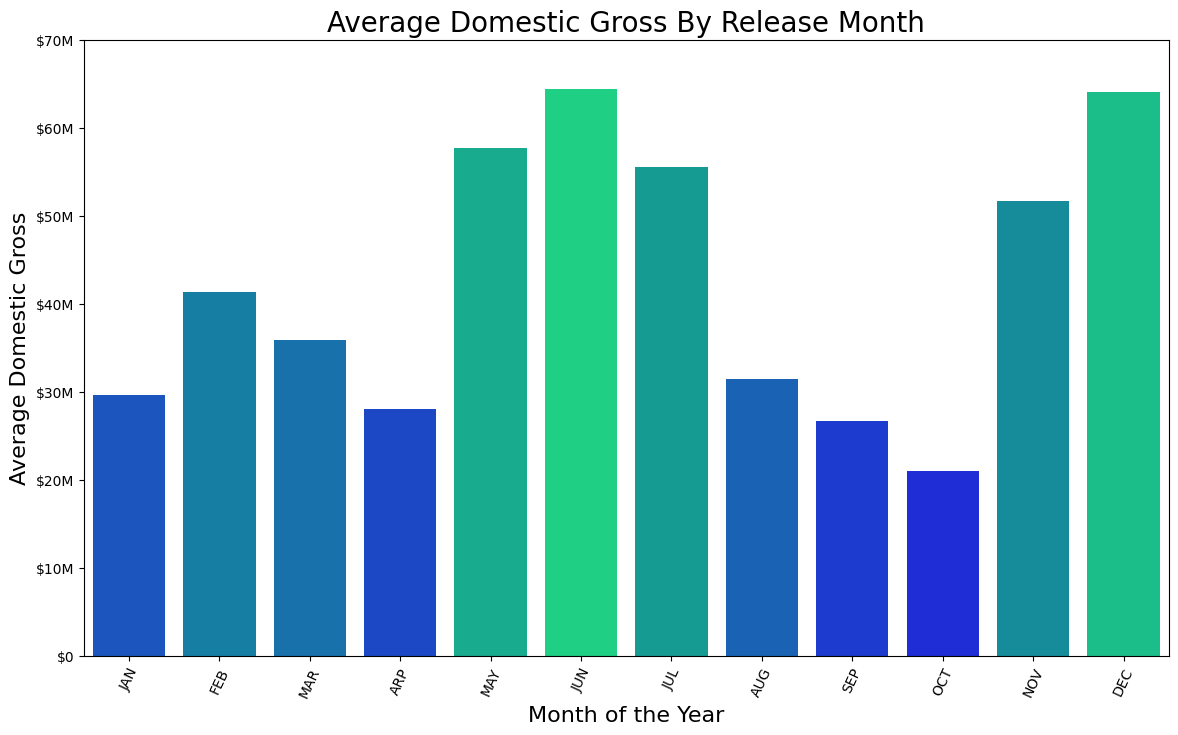

In [80]:
#Create a bar plot for the average domestic by release month
fig, ax = plt.subplots(figsize=(14,8))

pal = sns.color_palette("winter_r", len(monthly_avg))
rank = monthly_avg.argsort().argsort()

sns.barplot(x= monthly_avg.index, y = monthly_avg, palette=np.array(pal[::-1])[rank])

ax.set_title('Average Domestic Gross By Release Month', fontsize=20)
ax.set_xlabel('Month of the Year', fontsize=16)
ax.set_ylabel('Average Domestic Gross', fontsize=16)
xticks = np.linspace(start=0, stop=11, num=12)
ax.set_xticks(xticks)
ax.set_xticklabels(['JAN', 'FEB', 'MAR', 'ARP', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'], rotation=65)
yticks = np.linspace(start=0, stop=70000000, num=8)
ax.set_yticks(yticks)
ax.set_yticklabels(['$0', '$10M', '$20M', '$30M', '$40M', '$50M', '$60M', '$70M'])

plt.show()